### Outline 

1. Introduction
2. A Basic Linear Regression
3. Residuals and Squared Errors
4. Finding the Best Fit Line
    * Closed Form Equation
    * Inverse Matrix Techniques
    * Gradient Descent
5. Overfitting and Variance
6. Stochastic Gradient Descent
7. The Correlation Coefficient

#### 1. Introduction

A regression attempts to fit a function to observed data to make predictions
on new data. A linear regression fits a straight line to observed data,
attempting to demonstrate a linear relationship between variables and make
predictions on new data yet to be observed. 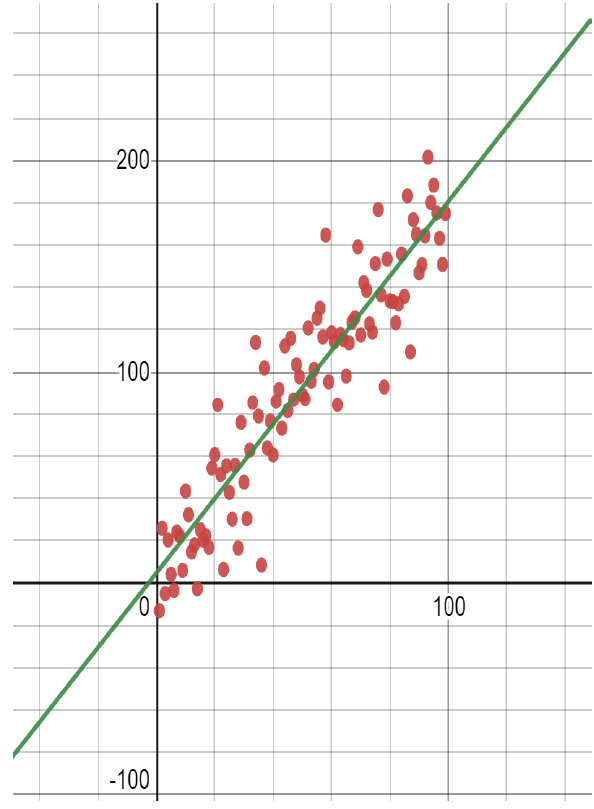

Linear regression is a workhorse of data science and statistics and not only
applies concepts we learned in previous chapters but sets up new
foundations for later topics like neural networks and logistic
regression.

Machine learning practitioners often take a different approach to validation,
starting with a train-test split of the data. Statisticians are more likely to use
metrics like prediction intervals and correlation for statistical significance.
We will cover both schools of thought so readers can bridge the everwidening
gap between the two disciplines, and thus find themselves best
equipped to wear both hats.

#### 2. A Basic Linear Regression

Let's assume, I want to study the relationship between the age of a dog and the number of
veterinary visits it had. In a fabricated sample we have 10 random dogs. I
am a fan of understanding complex techniques with simple datasets (real or
otherwise), so we understand the strengths and limitations of the technique
without complex data muddying the water. Making a plot for this dataset 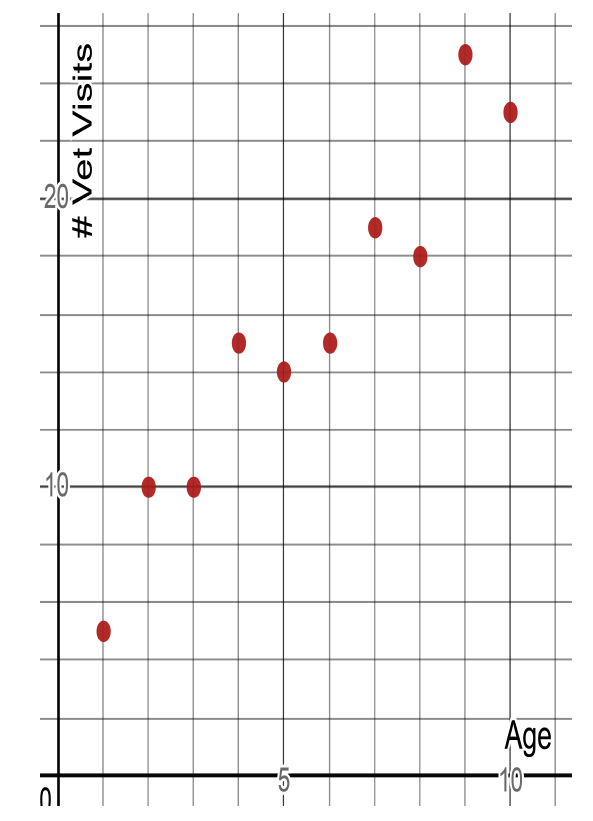
<center>
    Plotting a sample of 10 dogs with their age and number of vet visits

We can clearly see there is a linear correlation here, meaning when one of
these variables increases/decreases, the other increases/decreases in a
roughly proportional amount. We could draw a line through these points to
show a correlation like this in the figure below 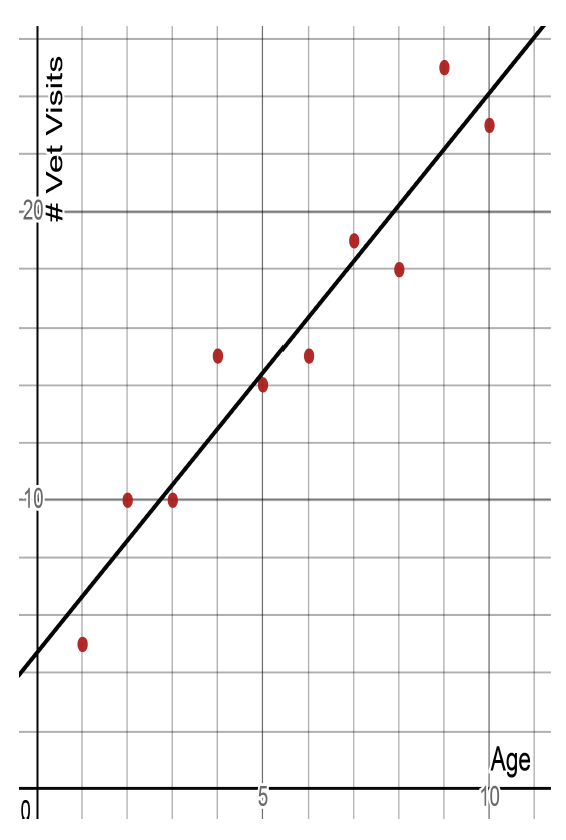 
<center>
  Fitting a line through our data  

There are plenty of platforms to perform a linear regression, from Excel to
Python and R. But we will stick with Python in this book, starting with
scikit-learn to do the work for us.

m = [1.93939394]
b = [4.73333333]


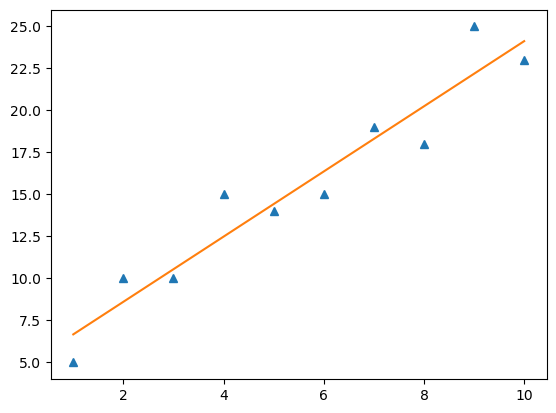

In [1]:
# Using scikit-learn to do a linear regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# show in chart
plt.plot(X, Y, '^') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

* First we import the data from this CSV on GitHub. 
* We separate the two columns into X and Y datasets using Pandas. 
* We then fit() the LinearRegression model to the input X data and the output Y data. 
* We can then get the m and b coefficients that describe our fitted linear function.

### 3. Residuals and Squared Errors

How do statistics tools like scikit-learn come up with a line that fits to these points? It comes down to two questions that are fundamental to machine learning training:

* What defines a “best fit”?
* How do we get to that “best fit”?


The first question has a pretty established answer: we minimize the squares,
or more specifically the sum of the squared residuals. Let’s break that
down. Draw any line through the points. The residual is the numeric
difference between the line and the points, 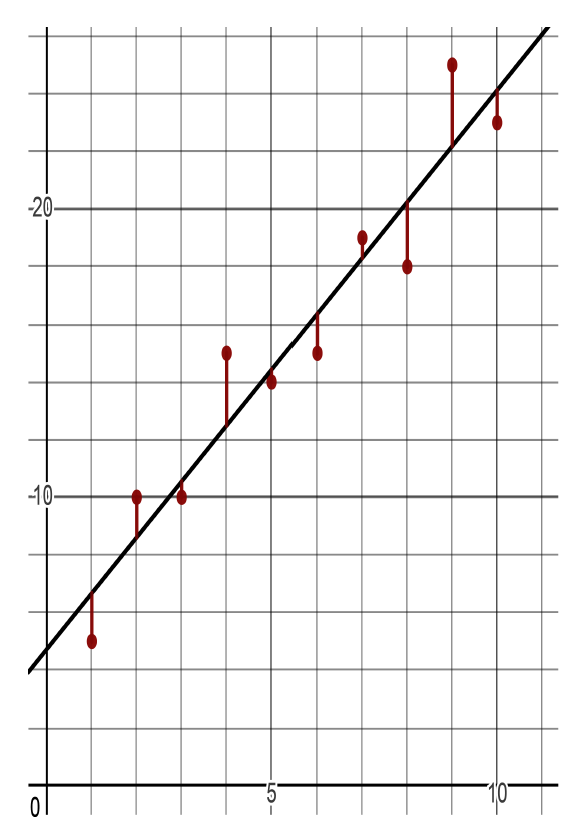

<center>
    The residuals are the differences between the line and the points

Points above the line will have a positive residual, and points below the line
will have a negative residual. In other words, it is the subtracted difference
between the predicted y-values (derived from the line) and the actual yvalues
(which came from the data). Another name for residuals are errors,
because they reflect how wrong our line is in predicting the data.

Let’s calculate these differences between these 10 points and the line y =
1.93939x + 4.73333 and the residuals for each point

In [5]:
# Calculating the residuals for a given line and data

import pandas as pd

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333
#residuals = []

# Calculate the residuals
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)    


-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


If we are fitting a straight line through our 10 data points, we likely want to minimize these residuals in total so there is the least gap possible between the line and points.

But how do we measure the “total”? The best approach
is to take the sum of squares, which simply squares each residual, or
multiplies each residual by itself, and sums them. We take each actual y-value
and subtract from it the predicted y-value taken from the line, then
square and sum all those differences.

In [4]:
# Calculating the sum of squares for a given line and data
import pandas as pd

# Import points
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333
sum_of_squares = 0.0

# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared
    
print("sum of squares = {}".format(sum_of_squares))
# sum of squares = 28.096969704500005

sum of squares = 28.096969704500005


Next question: how do we find the m and b values that will produce the minimum sum of squares, without using a library like scikit-learn? Let’s look at that next.

### 4. Finding the Best Fit Line

We now have a way to measure the quality of a given line against the data
points: the sum of squares. The lower we can make that number, the better
the fit. Now how do we find the right m and b values that create the least
sum of squares?

* Closed Form Equation

You may be thinking if there is a formula to fit a linear regression by exact calculation, you are right!!!! but only for a simple linear regression with one input variable

This luxury does not exist for many machine learning problems with several input variables and a large amount of data. We can use linear algebra techniques to scale up, and we will talk about this shortly. We will also take the opportunity to learn about search algorithms like stochastic gradient descent.

For a simple linear regression with only one input and one output variable, here are the closed form equations to calculate m and b.
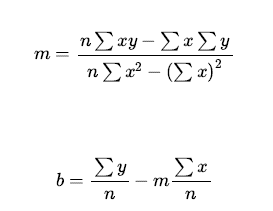

In [6]:
# Calculating m and b for a simple linear regression
import pandas as pd

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2)
b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)
# 1.9393939393939394 4.7333333333333325

1.9393939393939394 4.7333333333333325


* Inverse Matrix Techniques

Going forward, I will sometimes alternate the coefficients m and b with different names, β1 and β0, respectively. This is the convention you will see more often in the professional world, so it might be a good time to graduate.

We can use transposed and inverse matrices, to fit a linear regression. Next, we calculate a vector of coefficients b given a matrix of input variable values X and a vector of output variable values y. Without going down a rabbit hole of calculus and linear algebra proofs, here is the formula: 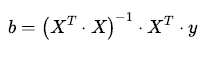

You will notice transposed and inverse operations are performed on the matrix X and combined with matrix multiplication. Here is how we perform this operation in NumPy to get our coefficients m and b.

In [10]:
# Using inverse and transposed matrices to fit a linear regression
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ X_1.transpose() @ Y
print(b) # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)

[1.93939394 4.73333333]


In this specific case, we take our matrix X, append an additional column of 1s to generate the intercept β0 just like before, and then decompose it into two component matrices Q and R:
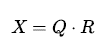
Avoiding more calculus rabbit holes, here is how we use Q and R to find the
beta coefficient values in the matrix form b:
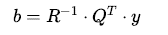


In [13]:
# Using QR decomposition to perform a linear regression
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept
# using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b) # [1.93939394, 4.73333333]

[1.93939394 4.73333333]


Typically, QR decomposition is the method used by many scientific libraries for linear regression because it copes with large amounts of data more easily and is more stable

* Gradient Descent
Gradient descent is an optimization technique that uses derivatives and iterations to minimize/maximize a set of parameters against an objective.

For the function f (x) = (x − 3)^2 + 4, let’s find the x-value that produces the lowest point of that function. While we could solve this algebraically, let’s use gradient descent to do it.

Here is visually what we are trying to do. we want to “step” x toward the minimum where the slope is 0. 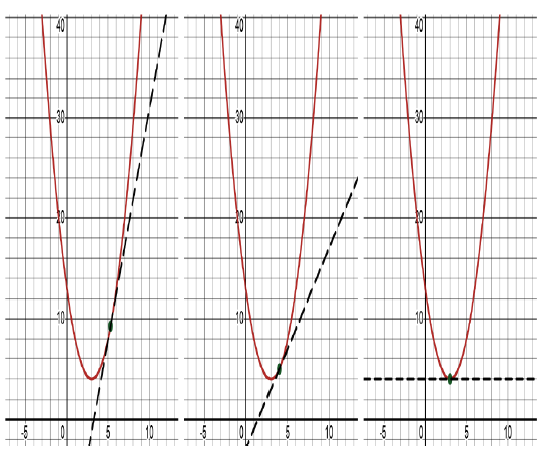
<center>
    Stepping toward the local minimum where the slope approaches 0

the function f(x) and its derivative with respect to x is dx_f(x). Recall  how to use SymPy to calculate derivatives. After finding the derivative, we then proceed to perform gradient descent.

In [15]:
# Using gradient descent to find the minimum of a parabola
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

# start at a random x
x = random.randint(-15, 15)

for i in range(iterations):
    # get slope
    d_x = dx_f(x)
    # update x by subtracting the (learning rate) * (slope)
    x -= L * d_x
    
print(x, f(x)) # prints 2.999999999999889 4.0

3.000000000000111 4.0


How do we calculate the slopes for m and b? We need the partial derivatives for each of these. What function are we taking the derivative of? Remember we are trying to minimize loss and that will be the sum of squares. So we need to find the derivatives of our sum of squares function with respect to m and b.


In [16]:
# Performing gradient descent for a linear regression
import pandas as pd

# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

n = float(len(points)) # Number of elements in X

# Perform Gradient Descent

for i in range(iterations):
    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)
    
    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)
    
    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))
# y = 1.9393939393939548x + 4.733333333333227

y = 1.9393939393939548x + 4.733333333333227


Well, not bad! That approximation got close to our closed form equation
solution. But what’s the catch? Just because we found the “best fit line” by
minimizing sum of squares, that does not mean our linear regression is any
good. Does minimizing the sum of squares guarantee a great model to make
predictions? Not exactly.

### 5. Overfitting and Variance

When you hear someone say a regression “memorized” the data rather than generalizing it, they are talking about overfitting.

This connect-the-dots model is severely overfit, meaning it shaped the regression to the training data too exactly to the point it will predict poorly on new data.This simple connect-the-dots model is sensitive to outliers that are far
away from the rest of the points, meaning it will have high variance in
predictions. Because overfitting increases variance, predictions are going to be
all over the place! 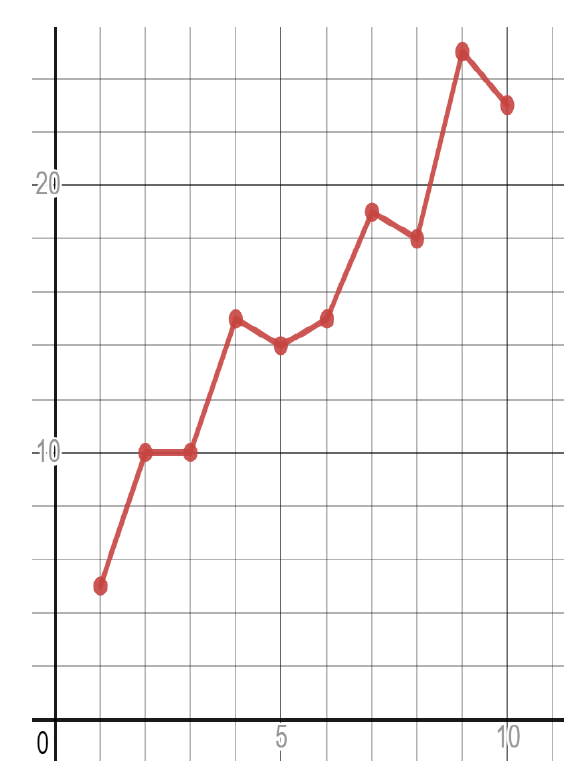
<center>
    Performing a regression by simply connecting the points, resulting in zero loss

As you can guess, we want to find effective generalizations in our model rather than memorize data. Otherwise, our regression simply turns into a database where we look up values.

When considering overfitting, there is a concept regarded as bias which is is used in models. This is why in machine learning you will find bias is added to the model, and linear regression is considered a highly biased model.

Bias in a model means we prioritize a method (e.g., maintaining a straight
line) as opposed to bending and fitting to exactly what the data says. A
biased model leaves some wiggle room hoping to minimize loss on new
data for better predictions, as opposed to minimizing loss on data it was
trained on. I guess you could say adding bias to a model counteracts
overfitting with underfitting, or fitting less to the training data

### 6. Stochastic Gradient Descent

In a machine learning context, you are unlikely to do gradient descent in
practice like we did earlier, where we trained on all training data (called
batch gradient descent). In practice, you are more likely to perform
stochastic gradient descent, which will train on only one sample of the
dataset on each iteration. In mini-batch gradient descent, multiple samples
of the dataset are used (e.g., 10 or 100 data points) on each iteration.

Why use only part of the data on each iteration? Machine learning
practitioners cite a few benefits. 
* First, it reduces computation significantly, as each iteration does not have to traverse the entire training dataset but only part of it. 
* The second benefit is it reduces overfitting.

After all, minimizing the loss is what causes overfitting and so we introduce some randomness to create a little bit of underfitting (but hopefully not too much).

Let's see how to perform stochastic gradient descent in Python. If you change the sample size to be more than 1, it will perform mini-batch gradient descent.

In [18]:
# Performing stochastic gradient descent for a linear regression
import pandas as pd
import numpy as np

# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values
n = data.shape[0] # rows

# Building the model
m = 0.0
b = 0.0
sample_size = 1 # sample size
L = .0001 # The learning Rate
epochs = 1_000_000 # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]
    
    # The current predicted value of Y
    Y_pred = m * x_sample + b
    
    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))
    
    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m # Update m
    b = b - L * D_b # Update b
    
    # print progress
    if i % 10000 == 0:
        print(i, m, b)
    
print("y = {0}x + {1}".format(m, b))

0 0.012 0.003
10000 2.345590236529595 1.8845964212716728
20000 2.221325237129275 2.8671371442670543
30000 2.090232939828881 3.4954202177586833
40000 2.062393500572158 3.9172550636326857
50000 2.0362654428597255 4.229753329353959
60000 1.9883008920060017 4.406021470331628
70000 1.9845706413057465 4.529287599064287
80000 1.9571393446362761 4.587299737391916
90000 1.938892381884006 4.647094239638707
100000 1.9282084421820778 4.677671421046511
110000 1.9611948922759785 4.710882588041899
120000 1.936529535334408 4.709113166997199
130000 1.9362326522076792 4.7446731334010455
140000 1.9362488556845592 4.747133225931015
150000 1.9347751069982528 4.745628513863368
160000 1.9313387318591213 4.7540591241806585
170000 1.9469176146290013 4.757297143181128
180000 1.9336825064718743 4.746072034371161
190000 1.9189304695054146 4.751097039499197
200000 1.9442206102932182 4.74469457267448
210000 1.9721527779573598 4.744802844392454
220000 1.946238154167458 4.7454836984418565
230000 1.9355653691474366 4.

### 7. The Correlation Coefficient

Let me introduce you to the
correlation coefficient, also called the Pearson correlation, which measures
the strength of the relationship between two variables as a value between –1
and 1. A correlation coefficient closer to 0 indicates there is no correlation.
A correlation coefficient closer to 1 indicates a strong positive correlation,
meaning when one variable increases, the other proportionally increases. If
it is closer to –1 then it indicates a strong negative correlation, which means
as one variable increases the other proportionally decreases.

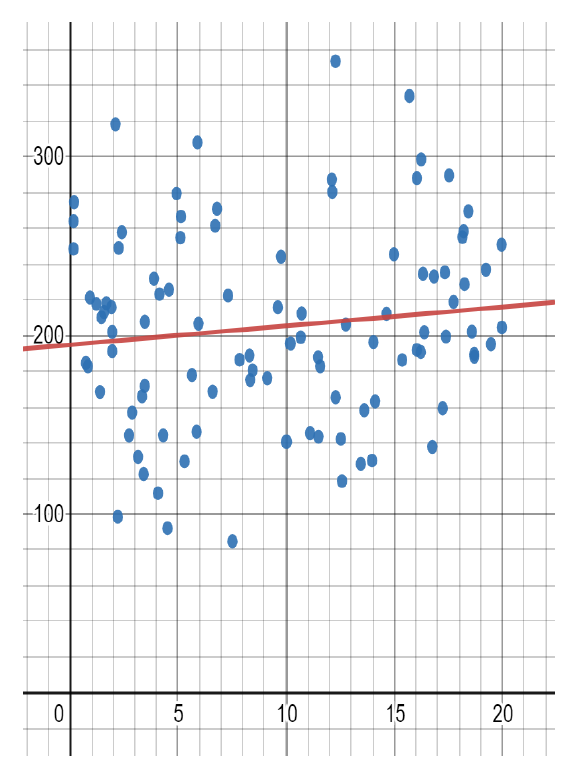
<center>
    A scatterplot of data with high variance

How do we use Python to calculate the correlation coefficient? Let’s use the
simple 10-point dataset we used earlier. A quick and easy way to analyze
correlations for all pairs of variables is using Pandas’s corr() function.
This makes it easy to see the correlation coefficient between every pair of
variables in a dataset, which in this case will only be x and y. This is
known as a correlation matrix.

In [21]:
# Using Pandas to see the correlation coefficient between every pair of variables
import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
correlations = df.corr(method='pearson')
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


* Calculating the correlation coefficient

For those who are mathematically curious how the correlation
coefficient is calculated, here is the formula:
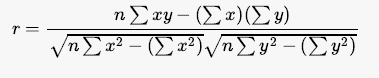

In [22]:
# Calculating correlation coefficient from scratch in Python
import pandas as pd
from math import sqrt

# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)
denominator = sqrt(n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2) * sqrt(n*sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator

print(corr)

# OUTPUT:
# 0.9575860952087218

0.9575860952087218


### Assignment

A dataset of two variables, x and y, is provided here>>>https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv

Perform a simple linear regression to find the m and b values that
minimizes the loss (sum of squares).